In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
data =pd.read_excel("Concrete_Data.xls")

In [3]:
data.head(4)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780


In [4]:
data = data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"furnace_slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"fly_ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"super_plasticizer",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse_agg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine_agg", 'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"compressive_strength"})

In [5]:
data.head(4)

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780


In [6]:
data.isnull().any()

cement                  False
furnace_slag            False
fly_ash                 False
water                   False
super_plasticizer       False
coarse_agg              False
fine_agg                False
age                     False
compressive_strength    False
dtype: bool

In [7]:
data.describe()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
data.shape
print ("Number of rows   "    ,data.shape[0])
print("number of colums ",data.shape[1])

Number of rows    1030
number of colums  9


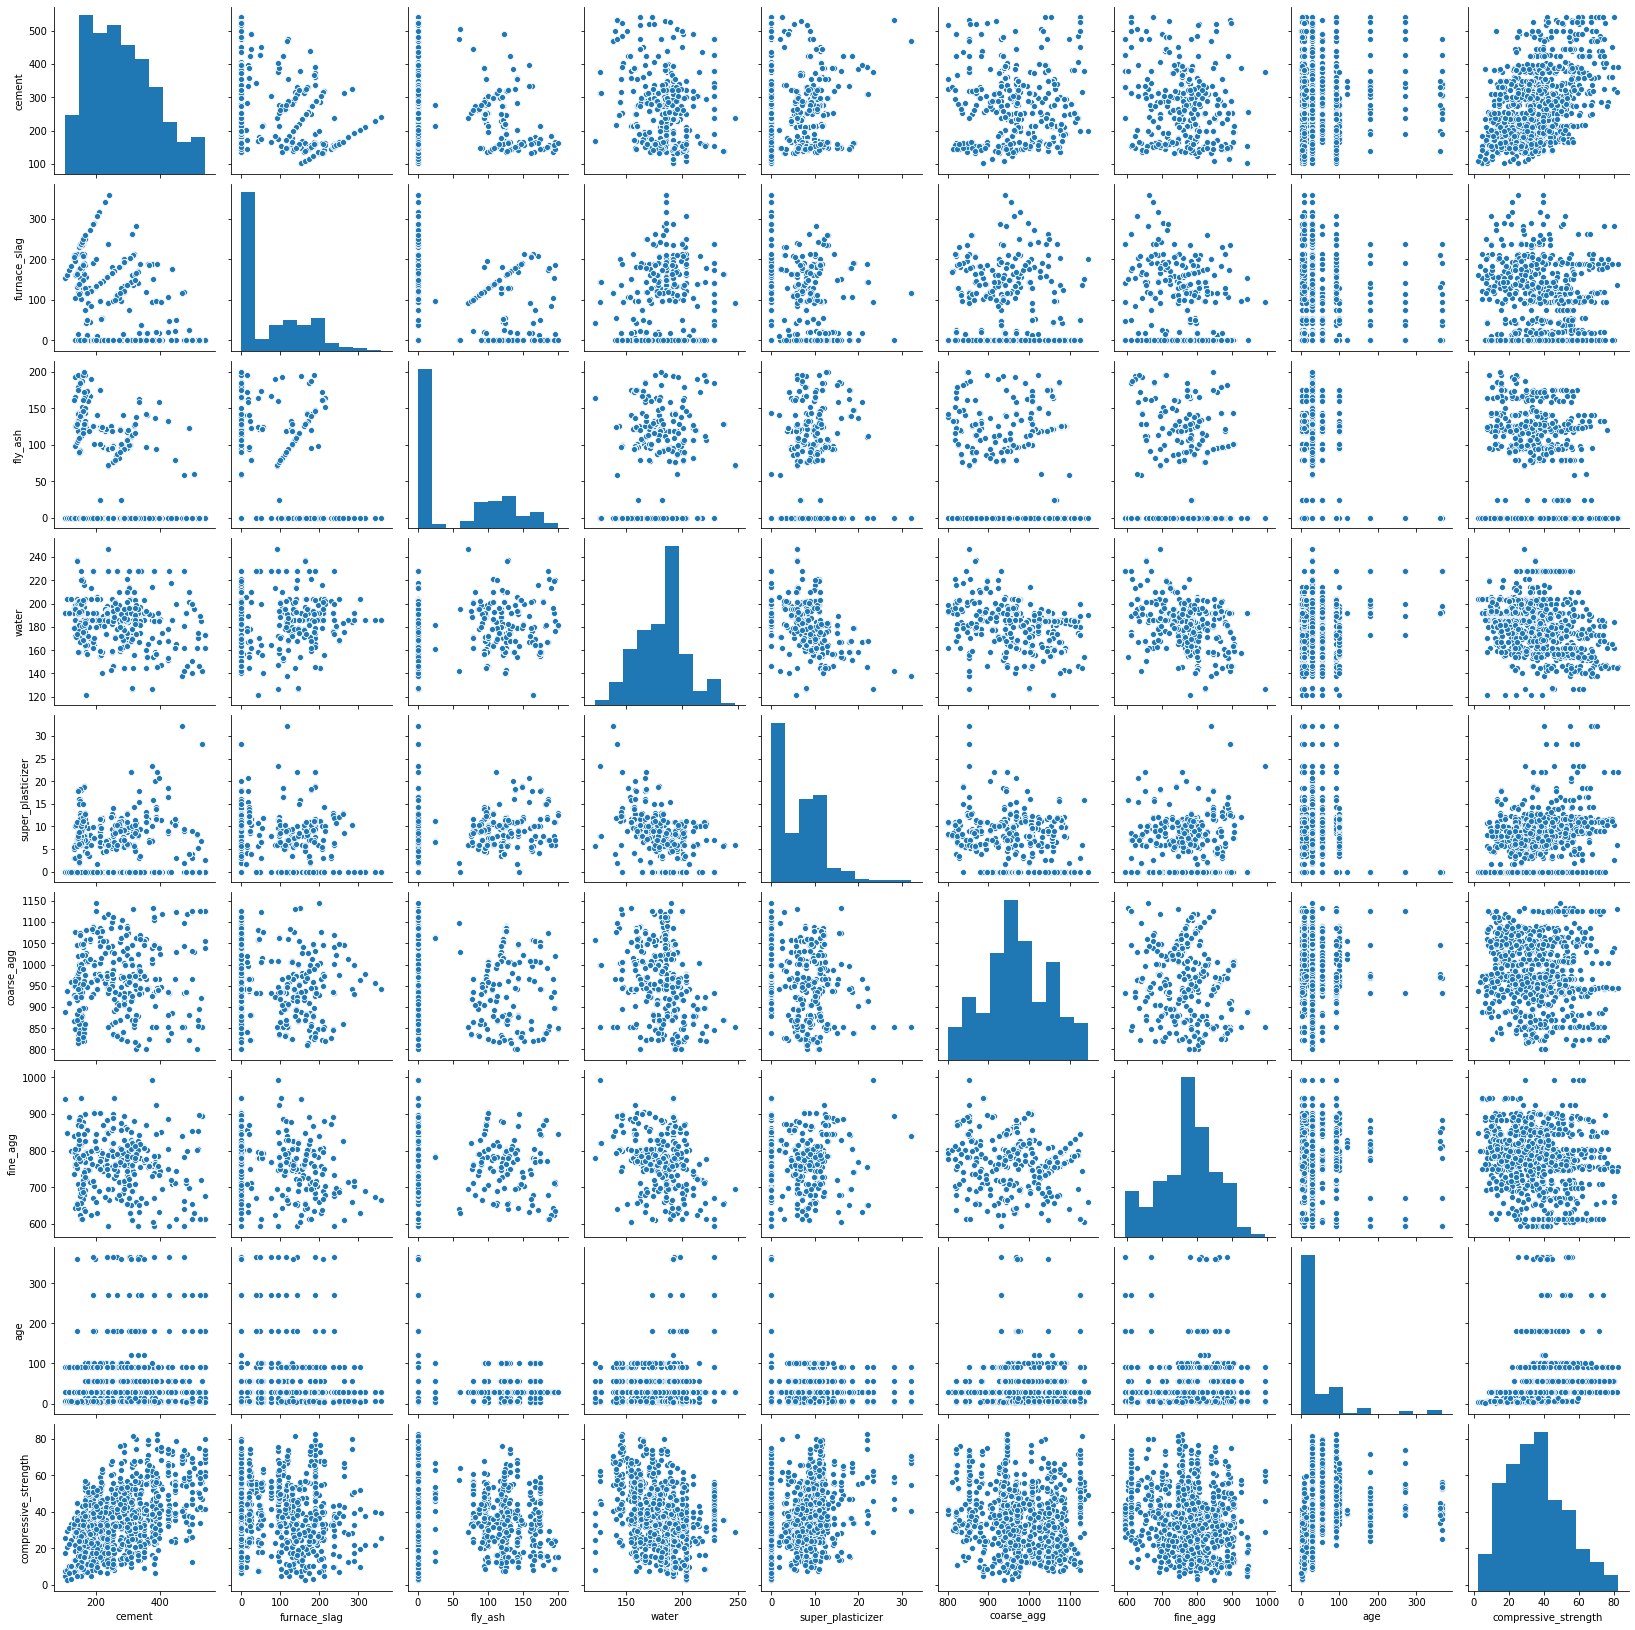

In [9]:
sns.pairplot(data)
plt.show()

In [10]:
x= data.iloc[:,0:8].values
y= data.iloc[:,8:9].values

In [11]:
x

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [12]:
y

array([[79.98611076],
       [61.88736576],
       [40.26953526],
       ...,
       [23.69660064],
       [32.76803638],
       [32.40123514]])

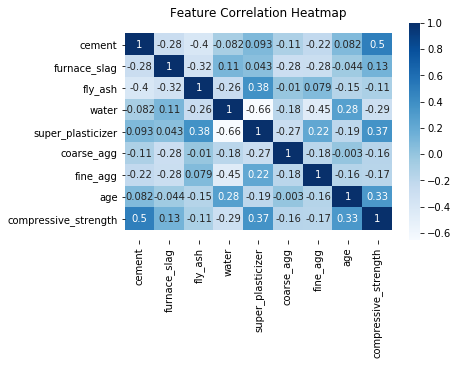

In [13]:
corr = data.corr()

sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
from sklearn.preprocessing  import StandardScaler
sc =StandardScaler()
x =sc.fit_transform(x)
y=sc.fit_transform(y)

In [15]:
x

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

In [16]:
y

array([[ 2.64519215],
       [ 1.5612771 ],
       [ 0.26660766],
       ...,
       [-0.7259282 ],
       [-0.18264932],
       [-0.20461667]])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
regressor  = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = regressor.predict(x_test)

In [20]:
y_pred

array([[ 2.00074347e-01],
       [-1.26942037e+00],
       [ 1.53430986e+00],
       [ 1.07684659e+00],
       [-6.67318945e-01],
       [ 1.05523823e+00],
       [ 6.12647324e-01],
       [-5.27101499e-01],
       [ 1.02837307e+00],
       [ 1.16612355e-01],
       [-1.13989784e+00],
       [ 2.13273588e-01],
       [-3.72941948e-01],
       [ 9.09410113e-03],
       [ 7.03681719e-01],
       [ 1.24134585e+00],
       [-2.10174619e-02],
       [-3.73852152e-01],
       [ 7.48857285e-01],
       [-4.36305617e-02],
       [ 1.05921554e+00],
       [-1.90243239e-01],
       [-1.81280334e-01],
       [ 7.21258509e-01],
       [-7.36074173e-01],
       [-7.37595667e-01],
       [ 2.00598308e+00],
       [-5.61235242e-01],
       [ 1.24078188e+00],
       [ 7.46340179e-01],
       [-1.01030113e+00],
       [ 5.52173037e-02],
       [-1.08506339e+00],
       [-9.55864028e-01],
       [-6.75847598e-01],
       [-1.21817135e+00],
       [ 1.02763945e+00],
       [-4.75082569e-01],
       [-4.9

In [21]:
from sklearn.metrics import r2_score 
accuracy = r2_score(y_test,y_pred)

In [22]:
accuracy

0.6368981103411094

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree =2)
x_poly = polyreg.fit_transform(x_train)  # x is having one column before, x is converted in to xpoly and it has 5 colums , x1, square of x1 cube of x1 and x power 4
polyreg.fit(x_poly,y_train)
poly = LinearRegression()
poly.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
ylin = poly.predict(polyreg.fit_transform(x_test))

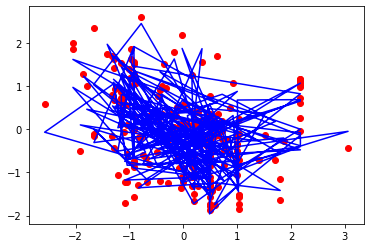

In [25]:
import matplotlib.pyplot as plt
plt.scatter(x_test[:,3],y_test,color = 'red')
plt.plot(x_test[:,3],ylin,color = 'blue')
plt.show()

In [26]:
acc2 = r2_score(y_test,ylin)

In [27]:
acc2

0.763551040725108

In [28]:
from sklearn.linear_model import Ridge,Lasso
ls = Lasso()
ls.fit(x_train,y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
yls = ls.predict(x_test)

In [30]:
yls

array([0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694, 0.01694,
       0.01694, 0.01

In [31]:
acc3 =r2_score(y_test,yls)

In [32]:
acc3

-0.007594222995079836

In [33]:
rig =Ridge()
rig.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
yrig = rig.predict(x_test)

In [35]:
yrig

array([[ 1.92105221e-01],
       [-1.26651595e+00],
       [ 1.52877660e+00],
       [ 1.07367641e+00],
       [-6.66315247e-01],
       [ 1.05924205e+00],
       [ 6.22545485e-01],
       [-5.26148957e-01],
       [ 1.02984815e+00],
       [ 1.22550019e-01],
       [-1.13360929e+00],
       [ 2.12571381e-01],
       [-3.78884823e-01],
       [ 3.75398307e-03],
       [ 7.06408353e-01],
       [ 1.24129711e+00],
       [-2.13029030e-02],
       [-3.72332897e-01],
       [ 7.47089495e-01],
       [-4.77304452e-02],
       [ 1.05049817e+00],
       [-1.87316057e-01],
       [-1.83070166e-01],
       [ 7.19558890e-01],
       [-7.32760553e-01],
       [-7.34625868e-01],
       [ 2.00870367e+00],
       [-5.60926268e-01],
       [ 1.24073307e+00],
       [ 7.44958251e-01],
       [-1.00672533e+00],
       [ 6.32078299e-02],
       [-1.08116601e+00],
       [-9.48237025e-01],
       [-6.71180375e-01],
       [-1.21351290e+00],
       [ 1.03171144e+00],
       [-4.76769233e-01],
       [-4.9

In [36]:
acc4 = r2_score(yrig,y_test)

In [37]:
acc4

0.4144223771107697

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)


C:\Users\91918\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
ypred1= rfr.predict(x)

In [41]:
ypred1

array([ 2.28109827,  2.22395427,  0.28049499, ..., -0.69492338,
       -0.18769026, -0.13559189])

In [42]:
acc6 =r2_score(y,ypred1)

In [43]:
acc6

0.9721291980733598

In [44]:
import pickle
pickle.dump(rfr,open('compressive strength.pkl','wb'))

ValueError: x and y must be the same size

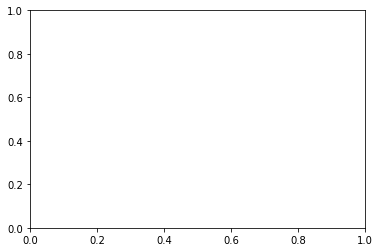

In [45]:
plt.scatter(y_test, ypred1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--' ,lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("random forest Regressor")
plt.show()